In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib as mp
import matplotlib.pyplot as plt
import os

# set the filepath and load in a shapefile
fp = "states.dbf"
map_df = gpd.read_file(fp)

map_df = map_df[map_df.STATE_NAME !='District of Columbia']

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head

<bound method NDFrame.head of         STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
0           Hawaii        1         15             Pacific         HI   
1       Washington        2         53             Pacific         WA   
2          Montana        3         30            Mountain         MT   
3            Maine        4         23         New England         ME   
4     North Dakota        5         38  West North Central         ND   
5     South Dakota        6         46  West North Central         SD   
6          Wyoming        7         56            Mountain         WY   
7        Wisconsin        8         55  East North Central         WI   
8            Idaho        9         16            Mountain         ID   
9          Vermont       10         50         New England         VT   
10       Minnesota       11         27  West North Central         MN   
11          Oregon       12         41             Pacific         OR   
12   New Hampshire   

In [145]:
df = pd.read_csv("deaths_per.csv", header=0)
df.head()

,US State Name,Unnamed: 0,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick_death_rate(in 1000 people_wkly),All_death_rate(in 1000 people_wkly),sick of all death,yearly_sick_deaths_per 1000,yearly_all_deaths_per_1000
0,West Virginia,322,53.312500,76,1844128,36.323940,426.096995,0.22,0.08,0.10,0.26,0.15,0.19,0.019697,0.231056,0.084691,10.242482,120.149164
1,Alabama,275,64.406250,95,4858979,62.455546,971.370977,0.24,0.09,0.11,0.26,0.14,0.17,0.012854,0.199913,0.063776,6.683891,103.954536
2,Arkansas,278,62.277778,57,2978204,46.513743,588.649858,0.25,0.09,0.11,0.25,0.13,0.17,0.015618,0.197653,0.078394,8.121387,102.779368
3,Maine,293,43.066667,43,1329328,18.896177,262.130166,0.20,0.07,0.11,0.26,0.16,0.20,0.014215,0.197190,0.071575,7.391714,102.538791
4,Mississippi,298,63.713889,63,2992333,41.424965,587.133233,0.26,0.10,0.11,0.25,0.13,0.16,0.013844,0.196213,0.070083,7.198725,102.030516


Text(0.1,0.08,'Source: HealthData.gov, 2009-2018')

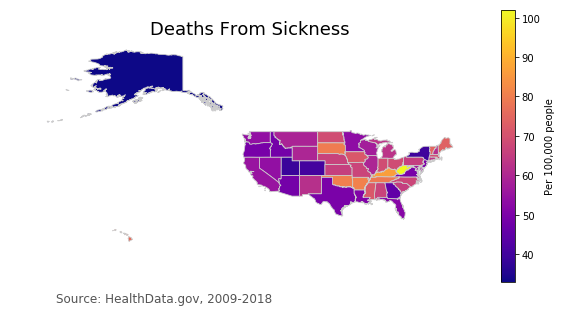

In [146]:
# Merge datasets
merged = map_df.set_index('STATE_NAME').join(df.set_index("US State Name"))

# set the range for the choropleth
vmin, vmax = 102,33 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.axis('off')
ax.set_title('Deaths From Sickness', fontdict={'fontsize': '18', 'fontweight' : '3'})
merged.plot(column='yearly_sick_deaths_per 1000', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

cbar.set_label('Per 100,000 people')

# create an annotation for the data source
ax.annotate('Source: HealthData.gov, 2009-2018',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

Text(0.1,0.08,'Source: HealthData.gov, 2009-2018')

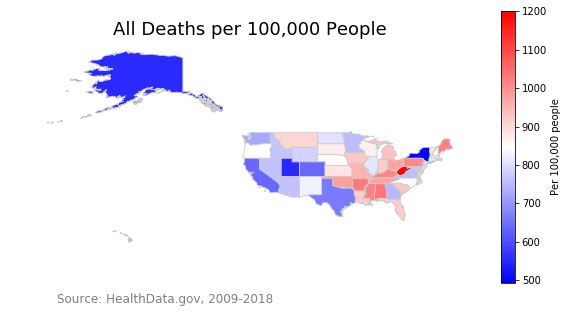

In [142]:
# Set the range values for the colarmap
vmin, vmax = 1201,494 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.axis('off')
ax.set_title('All Deaths per 100,000 People', fontdict={'fontsize': '18', 'fontweight' : '3'})

merged.plot(column='yearly_all_deaths_per_1000', cmap='bwr', linewidth=0.8, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar & label to the figure 
cbar = fig.colorbar(sm)
cbar.set_label('Per 100,000 people')
# create an annotation for the data source
ax.annotate('Source: HealthData.gov, 2009-2018',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='grey')

Text(0.1,0.08,'Source: HealthData.gov, 2009-2018')

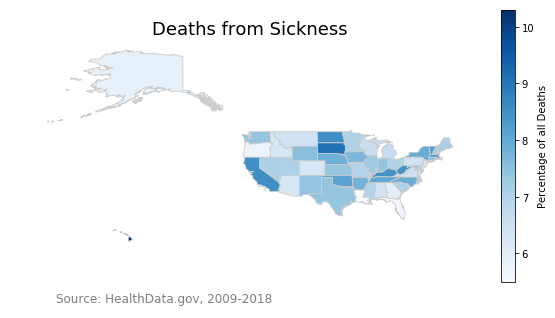

In [148]:
# Import Data on percentage of deaths from sickness
df = pd.read_csv("deaths_summary_data.csv", header=0)
merged = map_df.set_index('STATE_NAME').join(df.set_index('State'))
# Set the range values for the colarmap
vmin, vmax = 5.5,10.3 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.axis('off')
ax.set_title('Deaths from Sickness', fontdict={'fontsize': '18', 'fontweight' : '3'})

merged.plot(column='Pecent of deaths due to pneumonia or influenza', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar & label to the figure
cbar = fig.colorbar(sm)
cbar.set_label('Percentage of all Deaths')

# create an annotation for the data source
ax.annotate('Source: HealthData.gov, 2009-2018',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='grey')